# Método de Euler hacia adelante

**Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME PE101019**

- Autor: Luis M. de la Cruz Salas
- Rev: mié 24 feb 2021 14:41:27 CST

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import macti.visual as mvis
from macti.evaluation import Quizz, FileAnswer
quizz = Quizz('4', 'notebooks', 'Conduccion_de_calor_1D', 'local')
file_answer = FileAnswer('notebooks', 'Conduccion_de_calor_1D', 'local')

def plot_initial_status(ax, x, u):
    ax.plot(x,[0 for i in x], '-', c='gray', lw=5)#, label='Malla')
    ax.plot(x,u,'r-',lw=2, label='Cond. inicial')
    ax.plot([0,0],[0,-1], 'k--', lw=1.0)
    ax.plot([1,1],[0,1], 'k--', lw=1.0)
    ax.scatter([0,1],[u[0], u[-1]], fc='blue', ec='k', alpha=0.75, label='Cond. de frontera')
    ax.grid()

def buildMatrix(N, r):
    # Matriz de ceros
    A = np.zeros((N,N))
    
    # Primer renglón
    A[0,0] = 1 + 2 * r
    A[0,1] = -r
    
    # Renglones interiores
    for i in range(1,N-1):
        A[i,i] = 1 + 2 * r
        A[i,i+1] = -r
        A[i,i-1] = -r
    
    # Último renglón
    A[N-1,N-2] = -r
    A[N-1,N-1] = 1 + 2 * r
    
    return A

## <font color="DodgerBlue">Ejercicio 1.</font>

---

Definir:

* Coordenadas de la malla: $x$
* Arreglo para la solución final: $u$
* Valores de $u$ en la frontera.

---


In [2]:
# Parámetros físicos
L = 1.0   # Longitud del dominio
bA = -1   # Dirichlet en A
bB = 1    # Dirichlet en B
alpha = 1 # Parámetro físico

# Parámetros numéricos
N = 49        # Número de incógnitas
h = L / (N+1) # Tamaño de la malla
ht = 0.0001   # Paso del tiempo
Tmax = 1.0    # Tiempo total de simulación
Nt = int(Tmax / ht) # Número total de pasos
r = ht * alpha / h**2 
tolerancia = 1e-6 # Criterio de termino anticipado

# Variables para medir el rendimiento
suma_tiempos = 0.0 # Tiempo total
error = []  # Errores

print(" h = {}, ht = {}, Tmax = {}, Nt = {}, r = {}".format(h, ht, Tmax, Nt, r))

# Preparación de arreglos (malla, solución)
# x = ...
# u = ...
# Condiciones de frontera
# u[0] = ...
# u[N+1] = ...

### BEGIN SOLUTION
# Preparación de arreglos (malla, solución)
x = np.linspace(0,L,N+2) # Coordenadas de la malla
u = np.zeros(N+2)        # Arreglo para la solución
    
# Condiciones de frontera
u[0] = bA
u[N+1] = bB

file_answer.write('1', x, 'Las coordenadas de la malla están incorrectas.')
file_answer.write('2', u, 'El arreglo para la solución no está bien definido.')
### END SOLUTION

 h = 0.02, ht = 0.0001, Tmax = 1.0, Nt = 10000, r = 0.25


In [3]:
quizz.eval_numeric('1',x)

new
----------------------------------------
Tu resultado es correcto.
----------------------------------------


In [4]:
quizz.eval_numeric('2',u)

new
----------------------------------------
Tu resultado es correcto.
----------------------------------------


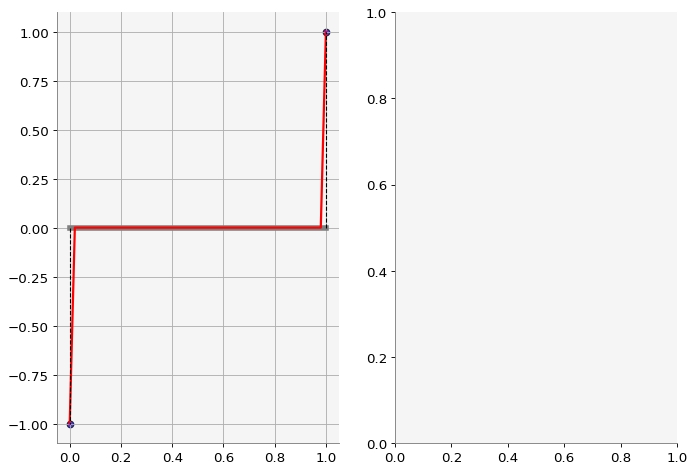

In [5]:
# Visualización de las condiciones iniciales y de frontera
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,7))
plot_initial_status(ax1, x, u)
plt.show()

## <font color="DodgerBlue">Ejercicio 2.</font>

---

Completar el código con el algoritmos de Euler hacia adelante.

---

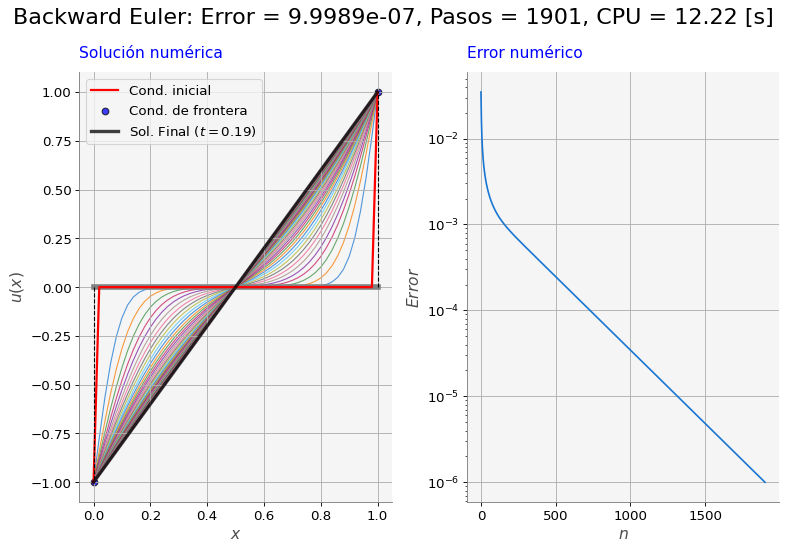

In [6]:
# Visualización de las condiciones iniciales y de frontera
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,7))
plot_initial_status(ax1, x, u)

# Lado derecho del sistema, contiene la condicion inicial u
f = np.copy(u[1:N+1])
# Copia de la solución para mantener el resultado en el paso previo.
uold = np.copy(u)

# Construcción de la matriz
A = buildMatrix(N,r)

# Ciclo en el tiempo, desde 1 hasta Nt-1
for n in range(1, Nt):
    ### BEGIN SOLUTION    
    t1 = time.perf_counter()    
    f[0] += r * bA
    f[N-1] += r * bB
    u[1:N+1] = np.linalg.solve(A,f) # Sol. del sistema lineal
    t2 = time.perf_counter()
    suma_tiempos += (t2 - t1)
    
    e = np.sqrt(h) * np.linalg.norm(uold-u)
    error.append(e)
    ### END SOLUTION    

    # Graficación cada 25 pasos
    if n % 25 == 0:
        ax1.plot(x,u,'-', lw = 1.0, alpha = 0.75, zorder=1)

    # Actualizacion de la solucion para dar el siguiente paso
    t1 = time.perf_counter()
    f = np.copy(u[1:N+1])
    uold = np.copy(u)
    t2 = time.perf_counter()
    suma_tiempos += (t2 - t1)

    # Terminación anticipada si se cumple la tolerancia
    if e < tolerancia:
        break

file_answer.write('3', error[-1], 'El error no está correctamente calculado.')
file_answer.write('4', n, 'El número de pasos no es el correcto, checa tu algoritmo.')

# Gráficación de resultados
titulo = 'Backward Euler: Error = {:5.4e}, Pasos = {:4d}, CPU = {:5.4} [s]'.format(e, n, suma_tiempos)
fig.suptitle(titulo, fontsize=20)

ax1.plot(x,u,'-k',lw=3,alpha=0.75,label='Sol. Final ($t=${:3.2f})'.format(n*ht))
ax1.set_xlabel('$x$')
ax1.set_ylabel('$u(x)$')
ax1.set_title('Solución numérica', color='blue')
ax1.legend()

ax2.plot(error)
ax2.set_yscale('log')
ax2.set_xlabel('$n$')
ax2.set_ylabel('$Error$')
ax2.set_title('Error numérico', color='blue')
ax2.grid()

plt.tight_layout()
plt.show()

In [7]:
quizz.eval_numeric('3',error[-1])

----------------------------------------
Tu resultado es correcto.
----------------------------------------


In [10]:
quizz.eval_numeric('4',n)

----------------------------------------
Tu resultado es correcto.
----------------------------------------


In [9]:
file_answer.to_file('4')

El directorio :/home/jovyan/macti_notes/notebooks/utils/.ans/Conduccion_de_calor_1D/ ya existe
Respuestas y retroalimentación almacenadas.
